# Improving Supply Chain Management Using Supervised Regression 

## Introduction<br>
In the realm of Supply Chain Management, the efficient and seamless flow of goods and resources is pivotal. This project embarks on a journey to optimize this complex process through the power of Supervised Regression Analysis. Our dataset comprises crucial attributes such as warehouse details, geographical factors, and historical performance metrics. These parameters will be harnessed to develop and evaluate regression models, including Linear Regression, Decision Tree, Random Forest, AdaBoost, and Gradient Boosting, to predict and enhance various aspects of supply chain management. The project begins with data preprocessing and feature engineering, and then, proceeds to model building, followed by in-depth exploration through Exploratory Data Analysis (EDA). The objective is to uncover valuable insights, discover feature relationships, and ultimately, improve the overall efficiency of the supply chain.

### Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Loading Dataset

In [81]:
#loading Training Dataset
data1=pd.read_csv(r"C:\Users\babua\OneDrive\Desktop\Internship\supply_train.csv")
data1.head(5)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [82]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [83]:
#Loading Testing Dataset
data2=pd.read_csv(r"C:\Users\babua\OneDrive\Desktop\Internship\supply_test.csv")
data2.head(5)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [84]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

### Data Exploration

**Exploring Training dataset**

In [85]:
data1.shape

(16620, 25)

In [86]:
data1.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [87]:
#data Correlation
numeric_data1 = data1.select_dtypes(include=['number'])
corr=numeric_data1.corr()

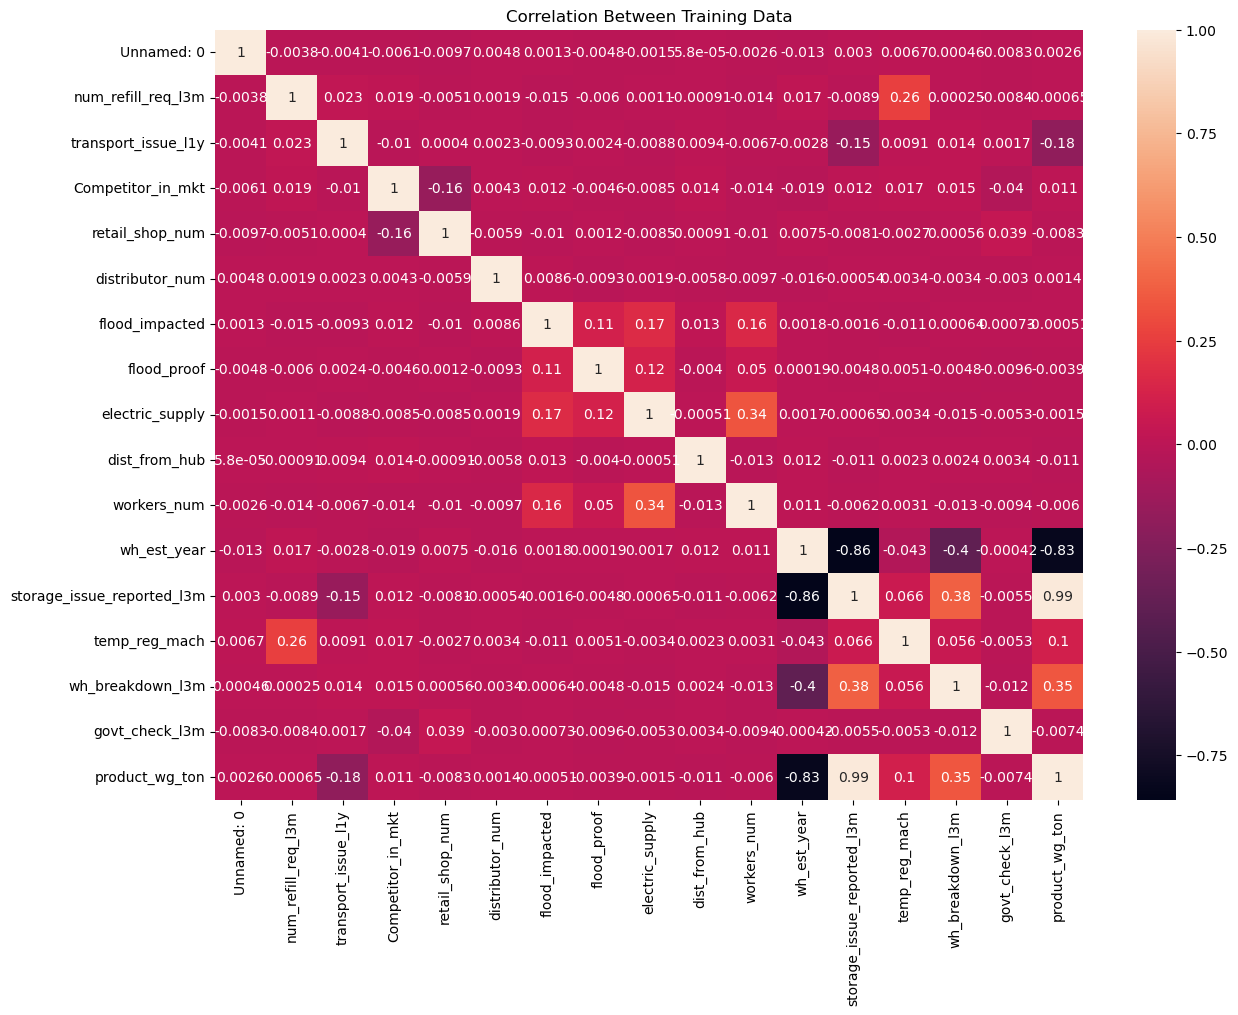

In [88]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr,annot=True)
plt.title('Correlation Between Training Data')
plt.show()


The correlation matrix reveals significant associations between certain features and the occurrence of reported storage issues. For instance, a robust positive correlation is evident between the frequency of refill requests and the instances of storage problems reported. This implies that warehouses with a high number of refill requests are also more likely to experience a greater number of storage issues.

Conversely, some features exhibit a weaker positive correlation with storage problems. For instance, there is a mild positive correlation between the number of distributors and the incidents of storage issues reported. This suggests that warehouses with a larger number of distributors are somewhat more prone to experiencing a higher count of storage issues.

On the other hand, certain features display a negative correlation with storage issues. For example, there is a substantial negative correlation between the year of establishment of a warehouse and the reported storage issues. This means that older warehouses tend to report more storage issues.

It's important to emphasize that correlation doesn't imply causation. Merely because two variables are correlated does not mean one directly causes the other. For instance, the strong positive correlation between refill requests and storage issues doesn't prove that refill requests cause storage problems. There could be an underlying third factor that influences both refill requests and storage issues, such as ineffective warehouse management.

Here are some specific insights that can be gained from the correlation matrix:

Warehouses with a high number of refill requests, transportation issues, and competitors in the market are more likely to have a high number of storage issues reported.<br>
Warehouses that are flood-impacted or have unreliable electric supply are more likely to have a high number of storage issues reported.<br>
Warehouses that are older or have less temperature-regulated machinery are more likely to have a high number of storage issues reported.<br>
Warehouses with more workers or that have been inspected by the government in the past 13 months are less likely to have a high number of storage issues reported.

In [89]:
#unique values
l={}
for feature in data1.columns:
    unique_values=data1[feature].unique()
    l[feature]={"unique values":unique_values,'length of feature':len(unique_values)}
for feature,info in l.items():
    print(f"Feature: {feature}")
    print(f"Unique values: {info['unique values']}")
    print(f"Number of unique values: {info['length of feature']}")
    print("-" * 30)

Feature: Unnamed: 0
Unique values: [    0     1     2 ... 16617 16618 16619]
Number of unique values: 16620
------------------------------
Feature: Ware_house_ID
Unique values: ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
Number of unique values: 16620
------------------------------
Feature: WH_Manager_ID
Unique values: ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Number of unique values: 16620
------------------------------
Feature: Location_type
Unique values: ['Urban' 'Rural']
Number of unique values: 2
------------------------------
Feature: WH_capacity_size
Unique values: ['Small' 'Large' 'Mid']
Number of unique values: 3
------------------------------
Feature: zone
Unique values: ['West' 'North' 'South' 'East']
Number of unique values: 4
------------------------------
Feature: WH_regional_zone
Unique values: ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Number of unique values: 6
-----------------------

**Exploring Testing Dataset**

In [90]:
data2.shape

(5529, 25)

In [91]:
data2.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [92]:
#Data correlation
numeric_data2=data2.select_dtypes(include=['number'])
corr2=numeric_data2.corr()

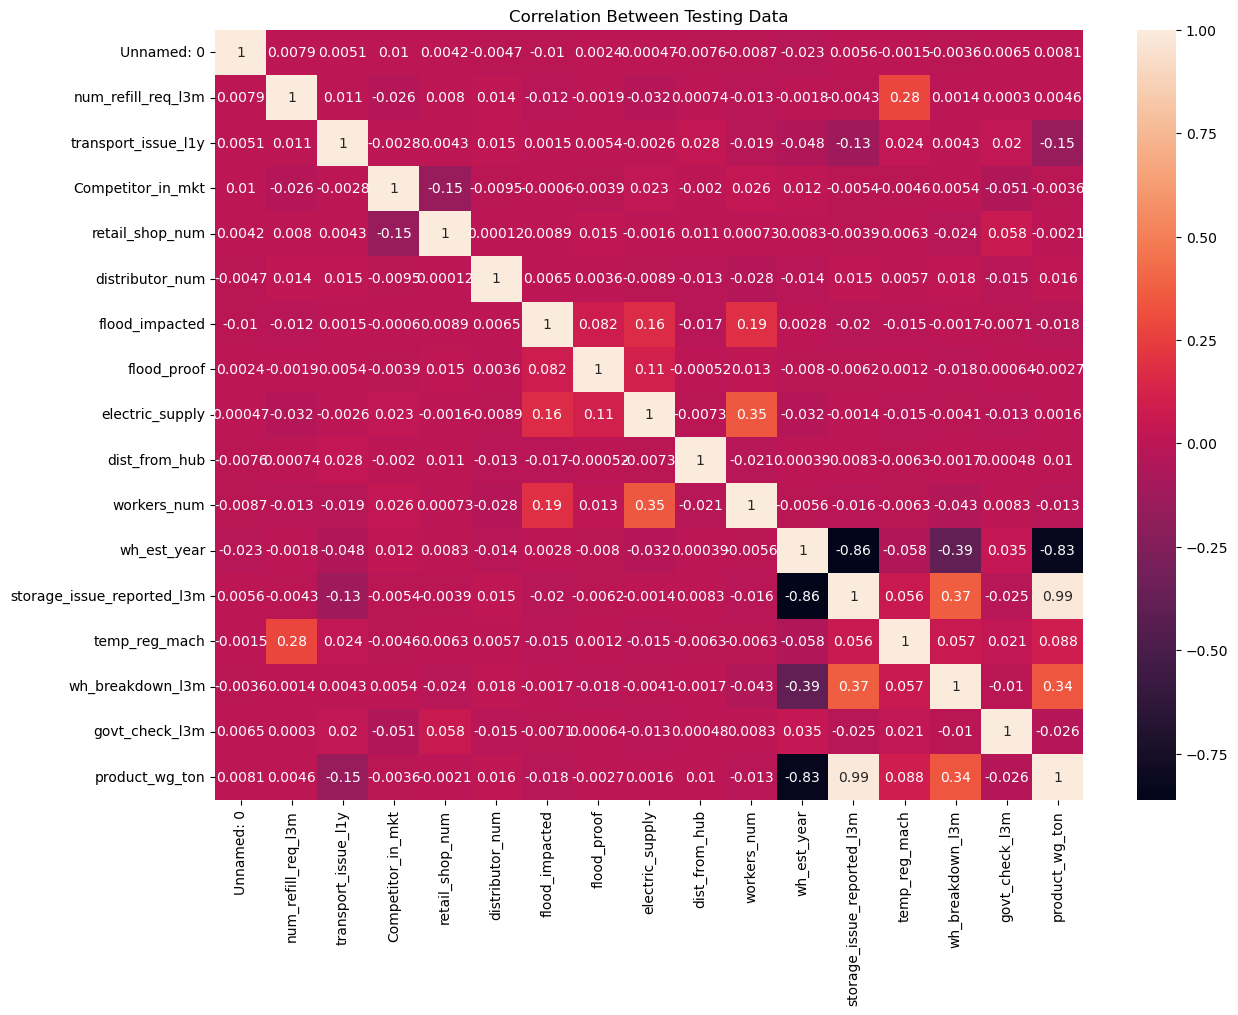

In [93]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr2,annot=True)
plt.title('Correlation Between Testing Data')
plt.show()


The correlation matrix shows that some features are strongly correlated with storage issues reported. For example, there is a strong positive correlation between the number of refill requests and storage issues reported. This means that warehouses that have a high number of refill requests are also more likely to have a high number of storage issues reported.

Other features are less strongly correlated with storage issues reported. For example, there is a weak positive correlation between the number of distributors and storage issues reported. This means that warehouses that have a high number of distributors are slightly more likely to have a high number of storage issues reported.

Some features are negatively correlated with storage issues reported. For example, there is a strong negative correlation between the warehouse establishment year and storage issues reported. This means that older warehouses are more likely to have a high number of storage issues reported.

It is important to note that correlation does not equal causation. Just because two variables are correlated does not mean that one causes the other. For example, the fact that there is a strong positive correlation between the number of refill requests and storage issues reported does not mean that refill requests cause storage issues. It is possible that there is a third factor that causes both refill requests and storage issues, such as poor warehouse management.

Here are some specific insights that can be gained from the correlation matrix:

Warehouses with a high number of refill requests, transportation issues, and competitors in the market are more likely to have a high number of storage issues reported.<br>
Warehouses that are flood-impacted or have unreliable electric supply are more likely to have a high number of storage issues reported.<br>
Warehouses that are older or have less temperature-regulated machinery are more likely to have a high number of storage issues reported.<br>
Warehouses with more workers or that have been inspected by the government in the past 13 months are less likely to have a high number of storage issues reported.<br>

In [94]:
#Unique values
l={}
for feature in data2.columns:
    unique_value=data2[feature].unique()
    l[feature]={'unique values':unique_value,'length of features':len(unique_value)}
for feature,info in l.items():
    print(f"Feature: {feature}")
    print(f"Unique values: {info['unique values']}")
    print(f"Number of unique values: {info['length of features']}")
    print("-" * 30)

Feature: Unnamed: 0
Unique values: [16621 16622 16623 ... 22147 22148 22149]
Number of unique values: 5529
------------------------------
Feature: Ware_house_ID
Unique values: ['WH_116621' 'WH_116622' 'WH_116623' ... 'WH_122147' 'WH_122148'
 'WH_122149']
Number of unique values: 5529
------------------------------
Feature: WH_Manager_ID
Unique values: ['EID_66621' 'EID_66622' 'EID_66623' ... 'EID_72147' 'EID_72148'
 'EID_72149']
Number of unique values: 5529
------------------------------
Feature: Location_type
Unique values: ['Rural' 'Urban']
Number of unique values: 2
------------------------------
Feature: WH_capacity_size
Unique values: ['Large' 'Small' 'Mid']
Number of unique values: 3
------------------------------
Feature: zone
Unique values: ['North' 'West' 'South' 'East']
Number of unique values: 4
------------------------------
Feature: WH_regional_zone
Unique values: ['Zone 5' 'Zone 6' 'Zone 4' 'Zone 1' 'Zone 2' 'Zone 3']
Number of unique values: 6
--------------------------

### Data Cleaning

**Cleaning Training Dataset**

In [95]:
data1.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [96]:
#removing null values
data1['wh_est_year'].describe()

count    8760.000000
mean     2009.345320
std         7.544672
min      1996.000000
25%      2003.000000
50%      2009.000000
75%      2016.000000
max      2023.000000
Name: wh_est_year, dtype: float64

In [97]:
#replacing null values with meadian
median_value = data1['wh_est_year'].median()
data1['wh_est_year'].fillna(median_value,inplace=True)
median_value

2009.0

In [98]:
#dropping all other null values
data1=data1.dropna()
data1.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [99]:
data1.shape

(15374, 25)

In [100]:
data1.duplicated().sum()

0

**Cleaning Testing Dataset**

In [101]:
data2.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [102]:
#removing null values
data2['wh_est_year'].describe()

count    2844.000000
mean     2009.572785
std         7.473201
min      1996.000000
25%      2003.000000
50%      2010.000000
75%      2016.000000
max      2023.000000
Name: wh_est_year, dtype: float64

In [103]:
#replacing null values with meadian
median_value = data2['wh_est_year'].median()
data2['wh_est_year'].fillna(median_value,inplace=True)
median_value

2010.0

In [104]:
#dropping all other null values
data2=data2.dropna()
data2.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [105]:
data2.shape

(5120, 25)

In [106]:
data2.duplicated().sum()

0

### Feature Engineering

**Feature Engineering on Training Dataset**

In [107]:
data1.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [108]:
#dropping unnamed column
data1=data1.drop('Unnamed: 0',axis=1)
data1.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074


In [109]:
#creating a new feature warehouse_age 
c=2023
data1['warehouse_age']=c-data1['wh_est_year']
data1.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'warehouse_age'],
      dtype='object')

In [110]:
data1['WH_regional_zone'].info()

<class 'pandas.core.series.Series'>
Index: 15374 entries, 0 to 16619
Series name: WH_regional_zone
Non-Null Count  Dtype 
--------------  ----- 
15374 non-null  object
dtypes: object(1)
memory usage: 240.2+ KB


In [111]:
#Changing data type of WH_regional_zonw
def extract_num(d):
    num=d.split()[-1]
    return int(num)
data1['WH_regional_zone']=data1['WH_regional_zone'].apply(extract_num)
data1['WH_regional_zone'].info()

<class 'pandas.core.series.Series'>
Index: 15374 entries, 0 to 16619
Series name: WH_regional_zone
Non-Null Count  Dtype
--------------  -----
15374 non-null  int64
dtypes: int64(1)
memory usage: 240.2 KB


In [112]:
#Creating a new feature to understand the demand
data1['demand']=data1['num_refill_req_l3m']*data1['retail_shop_num']
data1.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,29.0,2009.0,13,0,A,5,15,17115,14.0,13953
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,31.0,2009.0,4,0,A,3,17,5074,14.0,0


In [113]:
# Calculate the "supply" as the difference between "product_wg_ton" and "demand"
data1['supply']=data1['product_wg_ton']-data1['demand']
data1.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand,supply
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,2009.0,13,0,A,5,15,17115,14.0,13953,3162
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,2009.0,4,0,A,3,17,5074,14.0,0,5074


In [114]:
#The code calculates the product of 'num_refill_req_l3m' and 'retail_shop_num' and stores the result in a new feature called 'demand_interaction.
data1['demand_interaction'] = data1['num_refill_req_l3m'] * data1['retail_shop_num']
data1.head(2)


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand,supply,demand_interaction
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,13,0,A,5,15,17115,14.0,13953,3162,13953
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,4,0,A,3,17,5074,14.0,0,5074,0


### Exploratory Data Analysis

In [115]:
#Most Supplied zone
zone_count=data1['zone'].value_counts()
most_supplied_zone = zone_count.idxmax()
print("Most Supplied Zone : ",most_supplied_zone)


Most Supplied Zone :  North


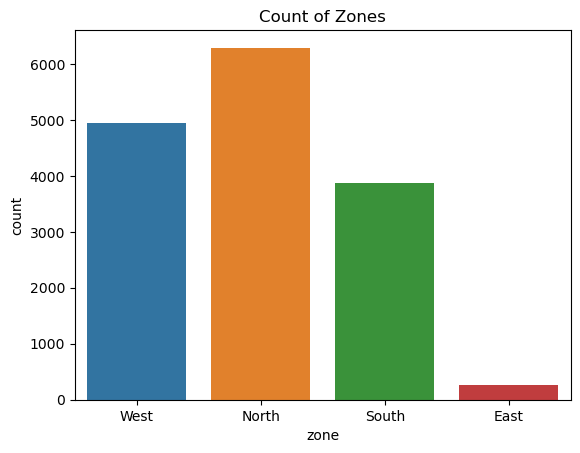

In [116]:
sns.countplot(x=data1.zone)
plt.title("Count of Zones")
plt.show()

**North zone have more number of warehouse,so we can assume that the supply is more in North zone.**

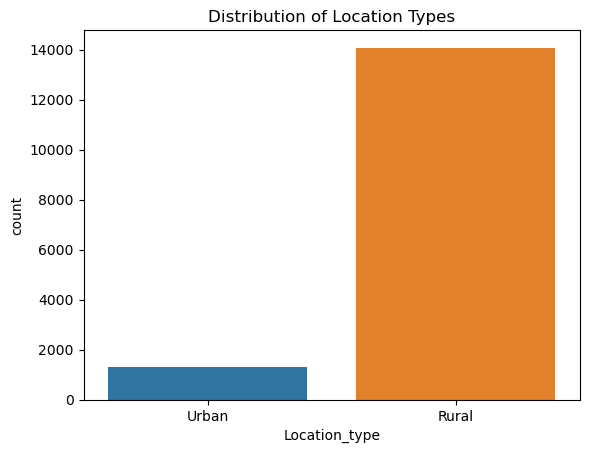

In [117]:
# Bar chart representing distribution of location types
sns.countplot(x='Location_type', data=data1)
plt.title('Distribution of Location Types')
plt.show()

**Most of the warehouse is located in Rural areas.**

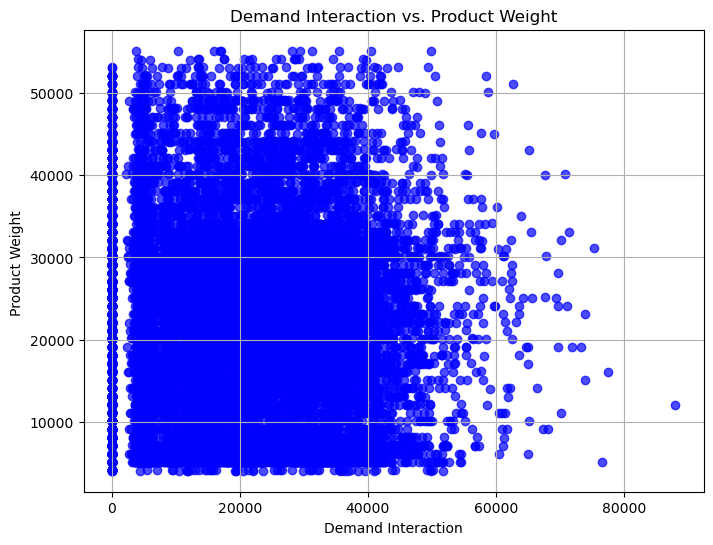

In [118]:
#Demand Interaction vs. Product Weight
plt.figure(figsize=(8, 6))
plt.scatter(data1['demand_interaction'], data1['product_wg_ton'], c='b', alpha=0.7)
plt.title('Demand Interaction vs. Product Weight')
plt.xlabel('Demand Interaction')
plt.ylabel('Product Weight ')
plt.grid(True)
plt.show()


**The scatter plot shows that heavier products tend to have more demand interaction, but there are other factors that influence demand interaction as well, such as price, brand, and quality.**

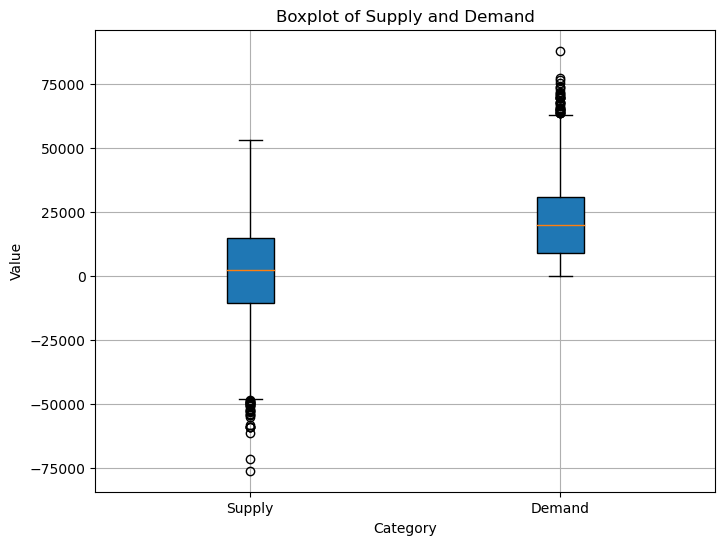

In [119]:
# Create a boxplot for supply and demand
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot([data1["supply"], data1["demand"]], patch_artist=True, labels=["Supply", "Demand"])

plt.title('Boxplot of Supply and Demand')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(True)
plt.show()


 **The box plot shows that the demand for the product is greater than the supply. This means that the product is overdemanded.**

**Demand is greater than supply.<br>
Product is overdemanded.**

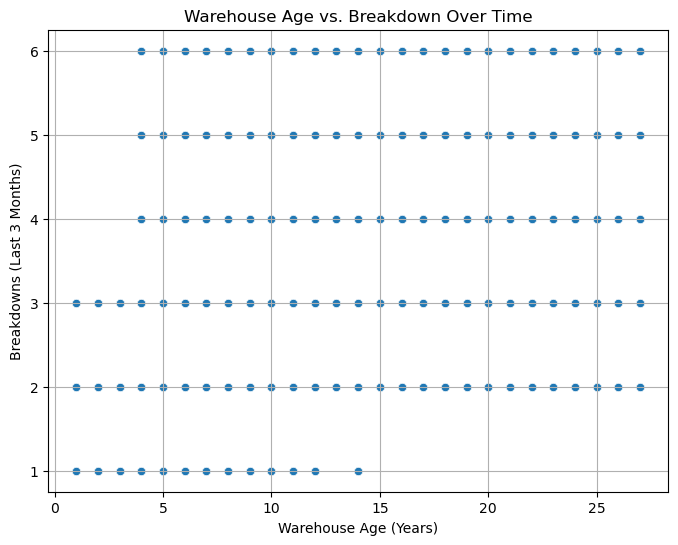

In [120]:
#Scatter plot showing breakdown of warehouse with respect tho their age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data1['warehouse_age'], y=data1['wh_breakdown_l3m'])
plt.title('Warehouse Age vs. Breakdown Over Time')
plt.xlabel('Warehouse Age (Years)')
plt.ylabel('Breakdowns (Last 3 Months)')
plt.grid(True)
plt.show()

**Warehouses tend to break down more often as they age. Warehouse managers should be more proactive in maintaining their warehouses and have a plan in place to deal with breakdowns when they happen.**

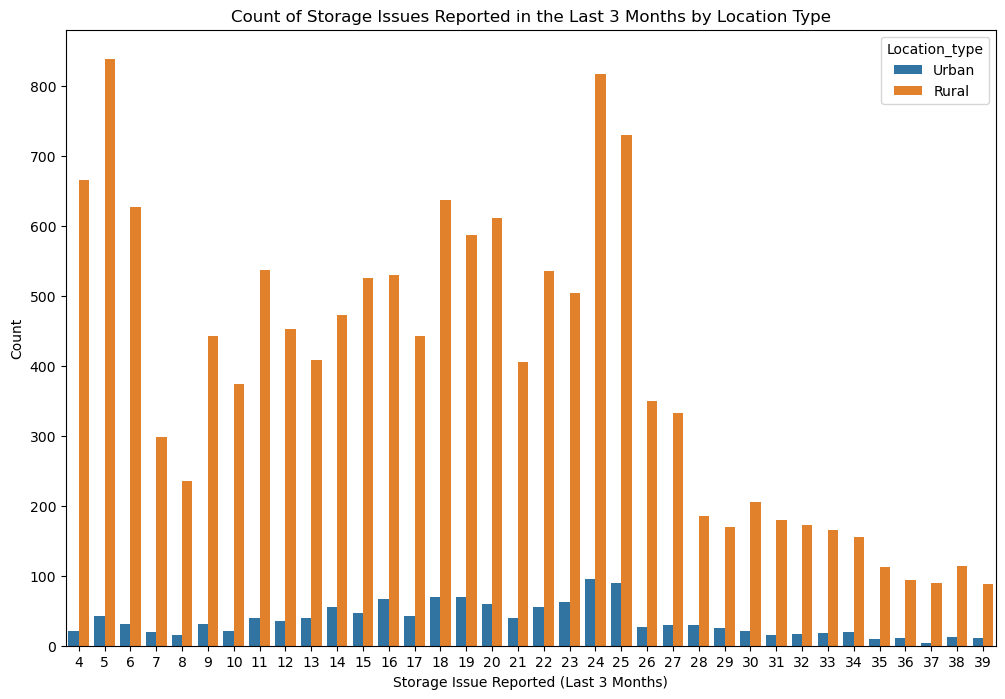

In [121]:
plt.figure(figsize=(12,8))
sns.countplot(x=data1['storage_issue_reported_l3m'],hue=data1['Location_type'])
plt.title('Count of Storage Issues Reported in the Last 3 Months by Location Type')
plt.xlabel('Storage Issue Reported (Last 3 Months)')
plt.ylabel('Count')
plt.show()

**The graph shows that compared to urban area rural area have more storage issues reported.**

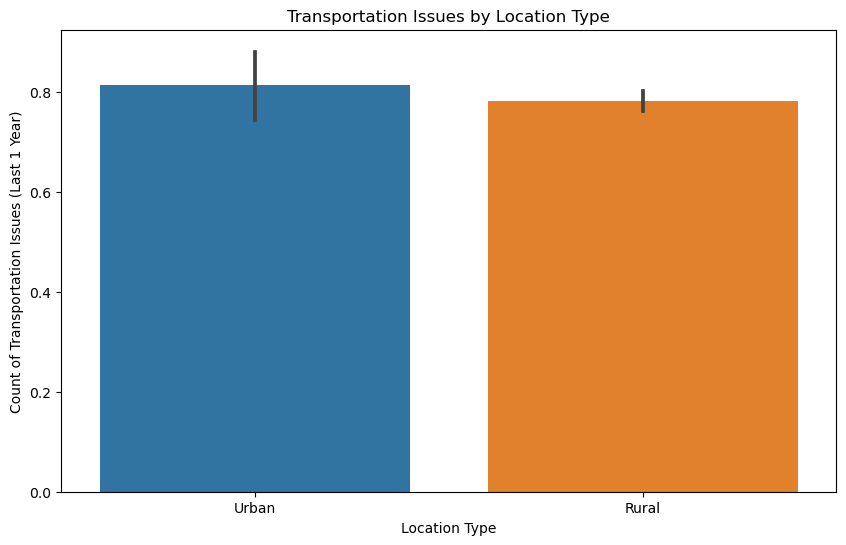

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data1, x='Location_type', y='transport_issue_l1y')

plt.title('Transportation Issues by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count of Transportation Issues (Last 1 Year)')
plt.show()

**The graph shows that the transportation issues is slightly higher in urban areas than in rural areas.** 

### Data Preprocessing

**Data Preprocessing on Training Dataset**

In [44]:
#removing columns which are created for EDA
data1=data1.drop(['demand','warehouse_age','supply','demand_interaction'],axis=1)
data1.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [45]:
#checking relevance of categorical values 
categorical_data=data1.select_dtypes(include='object')
for column in categorical_data:
    groups = data1[column].unique()
    anova_results = stats.f_oneway(*[data1['product_wg_ton'][data1[column] == group] for group in groups])
    
    print(f"ANOVA for {column}:")
    print("F-statistic:", anova_results.statistic)
    print("P-value:", anova_results.pvalue)
    print("\n")

C:\Users\babua\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


ANOVA for Ware_house_ID:
F-statistic: nan
P-value: nan


ANOVA for WH_Manager_ID:
F-statistic: nan
P-value: nan


ANOVA for Location_type:
F-statistic: 55.37690306018079
P-value: 1.0476108004964248e-13


ANOVA for WH_capacity_size:
F-statistic: 2.7683763510329418
P-value: 0.06279512251512342


ANOVA for zone:
F-statistic: 0.36610183397707896
P-value: 0.7774840059822651


ANOVA for wh_owner_type:
F-statistic: 0.28758363690822497
P-value: 0.5917809296483387


ANOVA for approved_wh_govt_certificate:
F-statistic: 141.61088112695347
P-value: 4.4548868153319954e-119





#### Highly Relevant Features:<br>

Location_type: This feature exhibits significant differences in the means of the numerical variable across different location types. It is highly relevant to the analysis.
Approved_wh_govt_certificate: This feature also demonstrates significant differences across different certificate approval types, making it highly relevant.<br>
#### Potentially Relevant Feature:

WH_capacity_size: The ANOVA test yields a borderline result with a p-value of 0.0628, indicating potential but not significant differences across capacity sizes. Further investigation may be warranted.<br>
#### Less Relevant Features:

Zone, wh_owner_type: These features do not show significant differences in the means of the numerical variable across their categories, rendering them less relevant for the current analysis.


In [46]:
#Removing less relevant features
data1=data1.drop(['WH_Manager_ID','zone','wh_owner_type'],axis=1)
data1.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [47]:
#changing Warehouse id to numeric value
def num(d):
    num = ''.join(filter(str.isdigit, d))
    return int(num)
data1['Ware_house_ID']=data1['Ware_house_ID'].apply(num)


In [48]:
data1['Ware_house_ID'].info()

<class 'pandas.core.series.Series'>
Index: 15374 entries, 0 to 16619
Series name: Ware_house_ID
Non-Null Count  Dtype
--------------  -----
15374 non-null  int64
dtypes: int64(1)
memory usage: 240.2 KB


In [49]:
cat=data1.select_dtypes(include='object')
d=cat.columns
d

Index(['Location_type', 'WH_capacity_size', 'approved_wh_govt_certificate'], dtype='object')

In [50]:
#Label Encoding Categorical variable
le=LabelEncoder()
data1['location encoded']=le.fit_transform(data1['Location_type'])
data1['WH_capacity_size encoded']=le.fit_transform(data1['WH_capacity_size'])
data1['encoded_wh_govt_certificate']=le.fit_transform(data1['approved_wh_govt_certificate'])
data_en1=data1.drop(['Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)


In [51]:
data_en1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15374 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ware_house_ID                15374 non-null  int64  
 1   WH_regional_zone             15374 non-null  int64  
 2   num_refill_req_l3m           15374 non-null  int64  
 3   transport_issue_l1y          15374 non-null  int64  
 4   Competitor_in_mkt            15374 non-null  int64  
 5   retail_shop_num              15374 non-null  int64  
 6   distributor_num              15374 non-null  int64  
 7   flood_impacted               15374 non-null  int64  
 8   flood_proof                  15374 non-null  int64  
 9   electric_supply              15374 non-null  int64  
 10  dist_from_hub                15374 non-null  int64  
 11  workers_num                  15374 non-null  float64
 12  wh_est_year                  15374 non-null  float64
 13  storage_issue_reporte

**Data Preprocessing on Testing data**

In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5120 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5120 non-null   int64  
 1   Ware_house_ID                 5120 non-null   object 
 2   WH_Manager_ID                 5120 non-null   object 
 3   Location_type                 5120 non-null   object 
 4   WH_capacity_size              5120 non-null   object 
 5   zone                          5120 non-null   object 
 6   WH_regional_zone              5120 non-null   object 
 7   num_refill_req_l3m            5120 non-null   int64  
 8   transport_issue_l1y           5120 non-null   int64  
 9   Competitor_in_mkt             5120 non-null   int64  
 10  retail_shop_num               5120 non-null   int64  
 11  wh_owner_type                 5120 non-null   object 
 12  distributor_num               5120 non-null   int64  
 13  flood_im

In [57]:
data2['WH_regional_zone']=data2['WH_regional_zone'].apply(extract_num)


In [58]:
data2['Ware_house_ID']=data2['Ware_house_ID'].apply(num)

In [59]:
#Removing less relevant features
data2=data2.drop(['Unnamed: 0','WH_Manager_ID','zone','wh_owner_type'],axis=1)
data2.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [60]:
#Label Encoding Categorical variable
le=LabelEncoder()
data2['location encoded']=le.fit_transform(data2['Location_type'])
data2['WH_capacity_size encoded']=le.fit_transform(data2['WH_capacity_size'])
data2['encoded_wh_govt_certificate']=le.fit_transform(data2['approved_wh_govt_certificate'])
data_en2=data2.drop(['Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)

In [61]:
data_en2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5120 entries, 0 to 5528
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ware_house_ID                5120 non-null   int64  
 1   WH_regional_zone             5120 non-null   int64  
 2   num_refill_req_l3m           5120 non-null   int64  
 3   transport_issue_l1y          5120 non-null   int64  
 4   Competitor_in_mkt            5120 non-null   int64  
 5   retail_shop_num              5120 non-null   int64  
 6   distributor_num              5120 non-null   int64  
 7   flood_impacted               5120 non-null   int64  
 8   flood_proof                  5120 non-null   int64  
 9   electric_supply              5120 non-null   int64  
 10  dist_from_hub                5120 non-null   int64  
 11  workers_num                  5120 non-null   float64
 12  wh_est_year                  5120 non-null   float64
 13  storage_issue_reported_

#### Splitting Training and Testing Data

In [62]:
X_train=data_en1.drop('product_wg_ton',axis=1)
y_train=data_en1['product_wg_ton']
X_test=data_en2.drop('product_wg_ton',axis=1)
y_test=data_en2['product_wg_ton']

In [63]:
X_train.head(2)

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,100000,6,3,1,2,4651,24,0,1,1,91,29.0,2009.0,13,0,5,15,1,2,0
1,100001,5,0,0,4,6217,47,0,0,1,210,31.0,2009.0,4,0,3,17,0,0,0


In [64]:
y_train.head(2)

0    17115
1     5074
Name: product_wg_ton, dtype: int64

In [65]:
X_test.head(2)

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,116621,5,5,0,3,5590,15,0,0,0,156,30.0,2006.0,24,0,2,5,0,0,0
1,116622,5,5,0,2,5856,40,0,0,1,79,31.0,2019.0,5,1,2,24,0,0,4


In [66]:
y_test.head(2)

0    30132
1     6075
Name: product_wg_ton, dtype: int64

### Machine Learning Model Development and Performance Evaluation

In [71]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()


grid_cv={'LinearRegression':lr,'DecisionTreeRegressor':dt,'RandomForestRegressor':rf,'AdaBoostRegressor':ada,
         'GradientBoostingRegressor':gb}
print("\033[1m\033[3mEvaluation Result \n")
for regressor_name,regressor in grid_cv.items():
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    score=r2_score(y_pred,y_test)
    mse=mean_squared_error(y_pred,y_test)
    msa=mean_absolute_error(y_pred,y_test)
    print('\033[1m\033[3m',regressor_name,'\n')
    print("mean square error = ",mse)
    print("mean absolute error = ",msa)
    print("r2 score = ",score*100,'\n')
    




Evaluation Result 

 LinearRegression 

mean square error =  1933266.9643863887
mean absolute error =  1088.525364604749
r2 score =  98.48899203531542 

 DecisionTreeRegressor 

mean square error =  1462885.885546875
mean absolute error =  855.0484375
r2 score =  98.88102356010354 

 RandomForestRegressor 

mean square error =  755630.7072982227
mean absolute error =  683.388279296875
r2 score =  99.41899115924681 

 AdaBoostRegressor 

mean square error =  2338591.367949363
mean absolute error =  1231.4792819067538
r2 score =  98.14398169599664 

 GradientBoostingRegressor 

mean square error =  723106.9919036495
mean absolute error =  674.9957897817534
r2 score =  99.44755501584129 



In [68]:
xg=xgb.XGBRegressor()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)


In [72]:
score=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("\033[1m\033[3mEvaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100)
    

Evaluation Result 

mean square error =  723106.9919036495
mean absolute error =  674.9957897817534
r2 score =  99.44755501584129


**Random Forest and Gradient Boosting Regressors were the best performing models among those evaluated. They had lower mean squared error and mean absolute error, which means they were better at predicting the target variable. The R² scores for both models were close to 99%, which means they fit the data well. Therefore, for this particular dataset, the Gradient Boosting Regressor is the best choice because it gives the most accurate and precise predictions of the target variable.**